VDMS query is in json format, equivalent to dictionary in python. 

Query can be sent in batches, in a list structure, hence, list of dict is usually used to submit query

## FindEntity

In [1]:
import vdms

db = vdms.vdms()
db.connect("localhost")

In [2]:
import json
def print_json(dictlist):
    print(json.dumps(dictlist, indent=2))

### FindEntity of certain class and specify the output

In [3]:
query = [
    {
        "FindEntity" : 
        {
            "class" : "Person", 
            "results" : 
            {
                "list" : [ "name", "lastname"]
            }
        }
    }
]   

response, blob = db.query(query)
print_json(response)

[
  {
    "FailedCommand": "Transaction",
    "info": "Failed PMGD Transaction: ReadOnly: ",
    "status": -1
  }
]


#### Find all entities

In [19]:
query = [
    {
        "FindEntity" : 
        {
            "results" : 
            {
                "list" : ["name"]
            }
        }
    }
]   

response, blob = db.query(query)
print_json(response)

[
  {
    "FailedCommand": "Transaction",
    "info": "Failed PMGD Transaction: ReadOnly: ",
    "status": -1
  }
]


# AddEntity

In [28]:
query = [
   {
      "AddEntity" : {
         "class" : "Runner", 
         "properties" : {
            "name": "Eliud", 
            "lastname": "Kipchoge"
         }
      }
   }
]
response, blob = db.query(query)
print_json(response)

[
  {
    "AddEntity": {
      "status": 0,
      "info": ""
    }
  }
]


In [31]:
query = {}
query['FindEntity'] = {}
query['FindEntity']['class'] = "Runner"
query['FindEntity']['results'] = {}
query['FindEntity']['results']['list'] = ['name']

response, blob = db.query([query])
print_json(response)

[
  {
    "FindEntity": {
      "status": 0,
      "returned": 1,
      "entities": [
        {
          "name": "Eliud"
        }
      ]
    }
  }
]


In [34]:
# Can we add entity without class? No

query = [
   {
      "AddEntity" : {
#          "class" : "Sprinter",
         "properties" : {
            "name": "Michael", 
            "lastname": "Johnson"
         }
      }
   }
]
response, blob = db.query(query)
print_json(response)

[
  {
    "FailedCommand": "Transaction",
    "status": -1,
    "info": "Error #1\n  context: <root>[0][AddEntity]\n  desc:    Missing required property 'class'.\nError #2\n  context: <root>[0]\n  desc:    Failed to validate against schema associated with property name 'AddEntity'.\nError #3\n  context: <root>[0]\n  desc:    Failed to validate against child schema #0.\nError #4\n  context: <root>[0]\n  desc:    Object contains a property that could not be validated using 'properties' or 'additionalProperties' constraints: 'AddEntity'.\nError #5\n  context: <root>[0]\n  desc:    Failed to validate against child schema #1.\nError #6\n  context: <root>[0]\n  desc:    Object contains a property that could not be validated using 'properties' or 'additionalProperties' constraints: 'AddEntity'.\nError #7\n  context: <root>[0]\n  desc:    Failed to validate against child schema #2.\nError #8\n  context: <root>[0]\n  desc:    Object contains a property that could not be validated using 'propert

# UpdateEntity

In [39]:
query = {}
query['FindEntity'] = {}
query['FindEntity']['class'] = "Person"
query['FindEntity']['results'] = {}
query['FindEntity']['results']['list'] = ['name']

response, blob = db.query([query])
print_json(response)

[
  {
    "FindEntity": {
      "status": 0,
      "returned": 7,
      "entities": [
        {
          "name": "Eliud"
        },
        {
          "name": "Eliud"
        },
        {
          "name": "luis"
        },
        {
          "name": "sofi"
        },
        {
          "name": "Thiago"
        },
        {
          "name": "sol"
        },
        {
          "name": "tom"
        }
      ]
    }
  }
]


In [43]:
query = {}
query['UpdateEntity'] = {}
query['UpdateEntity']['class'] = "Person"
query['UpdateEntity']['constraints'] = {}
query['UpdateEntity']['constraints']['name'] = ['==', 'luis']
query['UpdateEntity']['properties'] = {}
query['UpdateEntity']['properties']['role'] = 'Research Scientist'

response, blob = db.query([query])
print_json(response)

[
  {
    "UpdateEntity": {
      "status": 0,
      "count": 1
    }
  }
]


In [44]:
query = {}
query['FindEntity'] = {}
query['FindEntity']['class'] = "Person"
query['FindEntity']['constraints'] = {}
query['FindEntity']['constraints']['name'] = ['==', 'luis']
query['FindEntity']['results'] = {}
query['FindEntity']['results']['list'] = ['name', 'role']

response, blob = db.query([query])
print_json(response)

[
  {
    "FindEntity": {
      "status": 0,
      "returned": 1,
      "entities": [
        {
          "role": "Research Scientist",
          "name": "luis"
        }
      ]
    }
  }
]


## FindImage

In [53]:
# TODO: FindImage
query = [
    {
        "FindImage": 
        {
            "operations": [
                {
                 "type": "resize",
                 "height": 300,
                 "width": 300
                }
            ]
        }
    }
]
response, blob = db.query(query)
print_json(response)

[
  {
    "FindImage": {
      "status": 0,
      "returned": 32
    }
  }
]


In [55]:
len(blob)

32

In [58]:
%matplotlib inline
import matplotlib.pylab as plt

In [61]:
import util

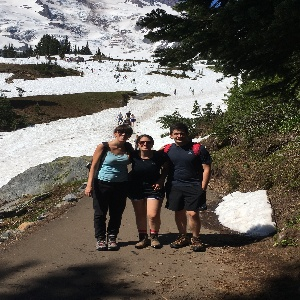

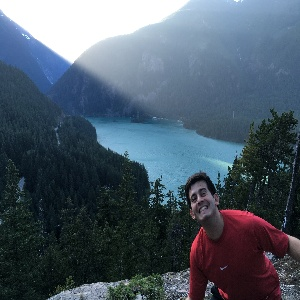

In [63]:
util.display_images(blob[0:2])

* Add "class" to result, add class for image and video
* FindEntity and results class
* shouldnt image and video have class as well?
* the "list" of results should be changed to property
* for python dictionary query, how to initialize dict structure?

Should list
1. All entities need to have a class label
2. able to "results" class
3. list available properties in an entity
4. Tools to get a global view? summary: n of entities? n connections
5. Wrap pmgd tools into python

In [37]:
# Chaining filters/contraints

### dig deep to backend

1. how reference is created, inferred? how intermediate results are cached
2. how addImage and addVideo are done differently?
3. Dig deep all unit test